In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


Rt2_Nils = '../other_programs/COVID19-R/Rvalues_from_smoothed_casedata/Rvalues_smoothed_std_2.csv'


In [3]:
# set cutoff 10 days later to include effects of shiftdays
crossval_2020_03_19 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate = '29/3/2020', verbose = False)
crossval_2020_03_31 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate =  '9/4/2020', verbose = False)
crossval_2020_04_06 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate = '16/5/2020', verbose = False)

In [5]:
shiftdaylist  = np.concatenate([np.arange(10)*2,[11,13]])
alphalist     = np.power(10,np.linspace(-4,-1,num=13))
crossvalcount = None

print(datetime.datetime.now().strftime('%H:%M:%S'))
crossval_2020_03_19.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
print(datetime.datetime.now().strftime('%H:%M:%S'))
crossval_2020_03_31.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
print(datetime.datetime.now().strftime('%H:%M:%S'))
crossval_2020_04_06.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
print(datetime.datetime.now().strftime('%H:%M:%S'))

01:14:01
04:05:28
06:46:54
09:36:40


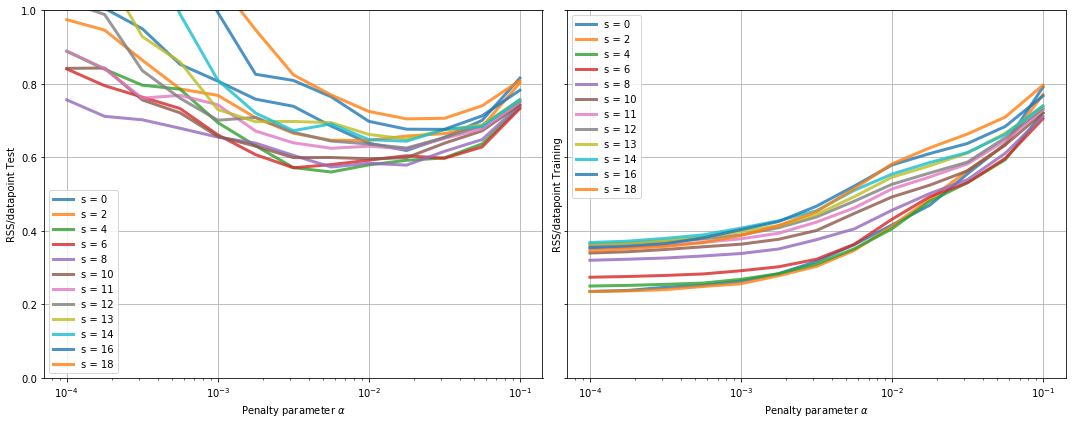

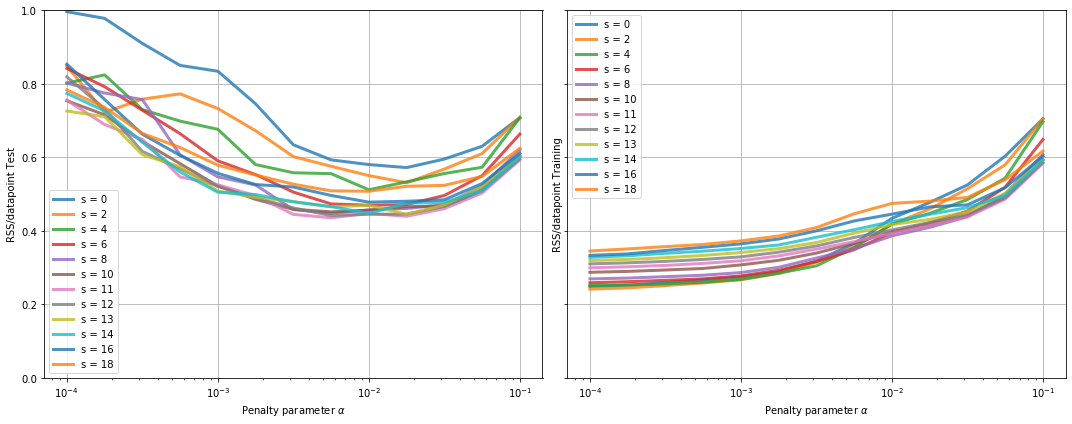

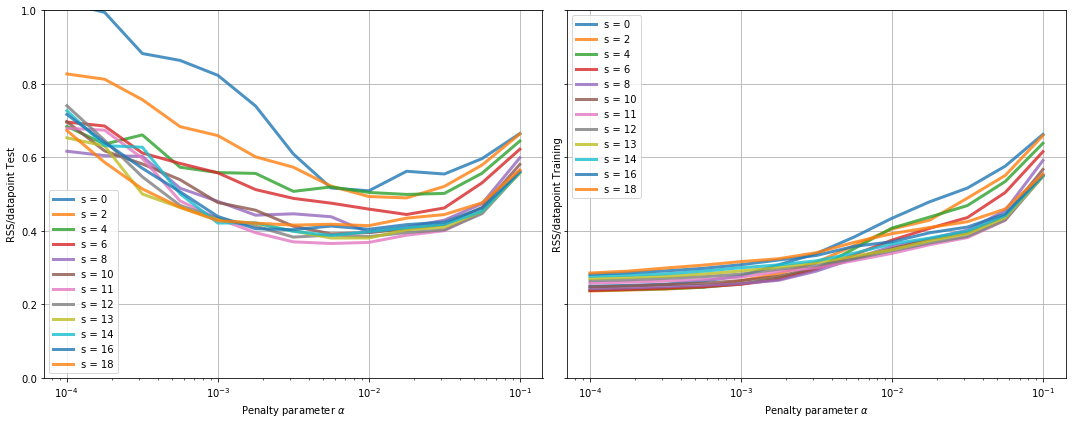

In [6]:
crossval_2020_03_19.PlotCVresults(filename = 'cv_Rt_2020-03-19.pdf')
crossval_2020_03_31.PlotCVresults(filename = 'cv_Rt_2020-03-31.pdf')
crossval_2020_04_06.PlotCVresults(filename = 'cv_Rt_2020-04-06.pdf')

In [7]:
print(crossval_2020_03_19.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_03_31.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_04_06.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())


    shiftdays     alpha  RSS Test Sum  Test Sample Size
37          4  0.005623    488.631329               872
47          6  0.003162    498.719779               872
34          4  0.003162    499.115460               872
63          8  0.005623    500.494209               872
56          8  0.017783    504.982580               872
     shiftdays     alpha  RSS Test Sum  Test Sample Size
89          11  0.005623    603.188423              1384
82          11  0.017783    608.901123              1384
102         12  0.005623    611.690569              1384
86          11  0.003162    616.036547              1384
108         13  0.017783    616.263672              1384
     shiftdays     alpha  RSS Test Sum  Test Sample Size
89          11  0.005623    681.958074              1864
79          11  0.010000    687.566171              1864
86          11  0.003162    690.358233              1864
115         13  0.005623    709.676014              1864
105         13  0.010000    709.92557

In [8]:
crossval_2020_03_19.ComputeFinalModels(modelparameters=[( 4,10**-2.25)])
crossval_2020_03_31.ComputeFinalModels(modelparameters=[(12,10**-2.25)])
crossval_2020_04_06.ComputeFinalModels(modelparameters=[(12,10**-2.25)])


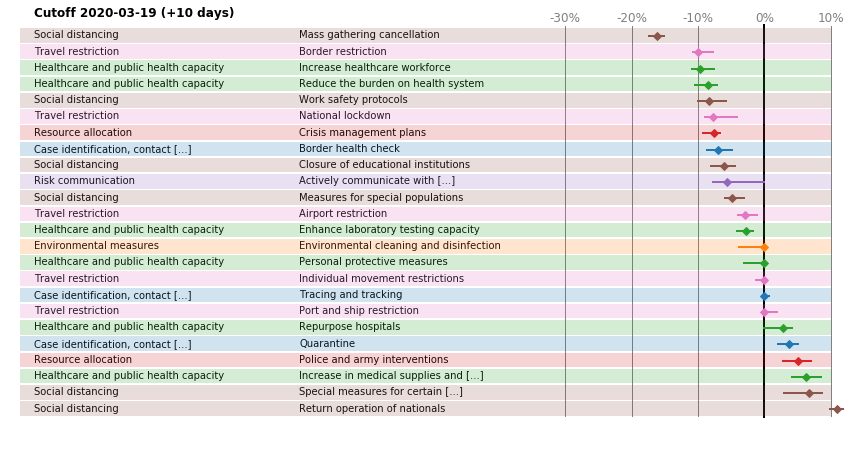

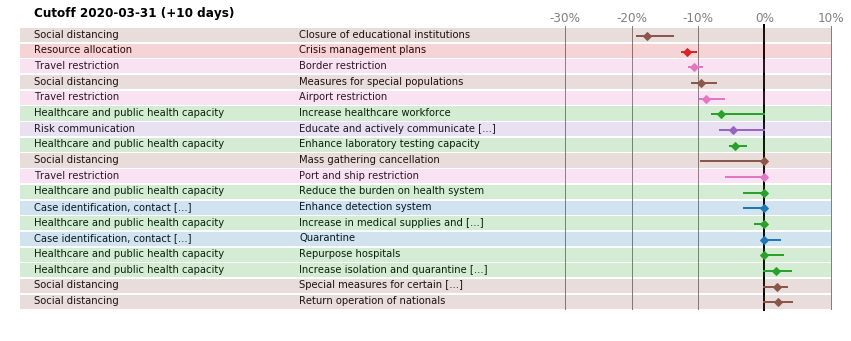

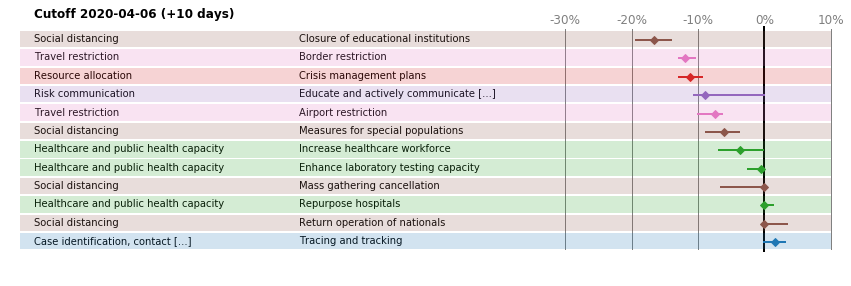

In [9]:
crossval_2020_03_19.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Cutoff 2020-03-19 (+10 days)',filename = 'measures_cutoff20200319.pdf')
crossval_2020_03_31.PlotMeasureListSorted(drop_zeros=True,figsize = (15,6),title = 'Cutoff 2020-03-31 (+10 days)',filename = 'measures_cutoff20200331.pdf')
crossval_2020_04_06.PlotMeasureListSorted(drop_zeros=True,figsize = (15,5),title = 'Cutoff 2020-04-06 (+10 days)',filename = 'measures_cutoff20200406.pdf')

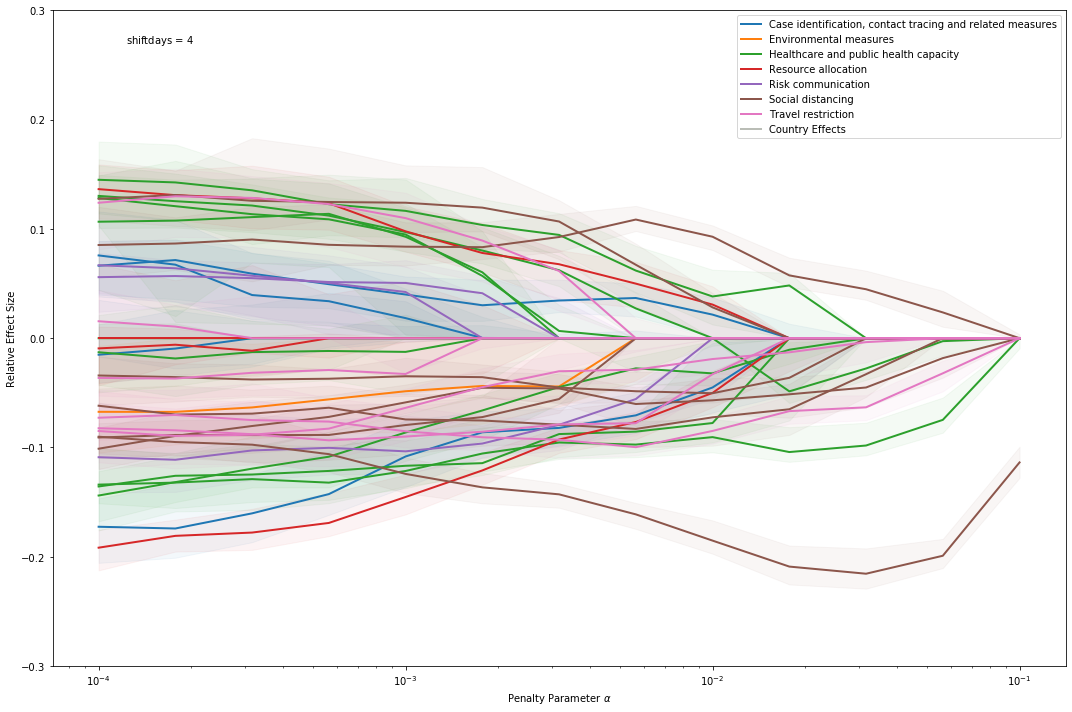

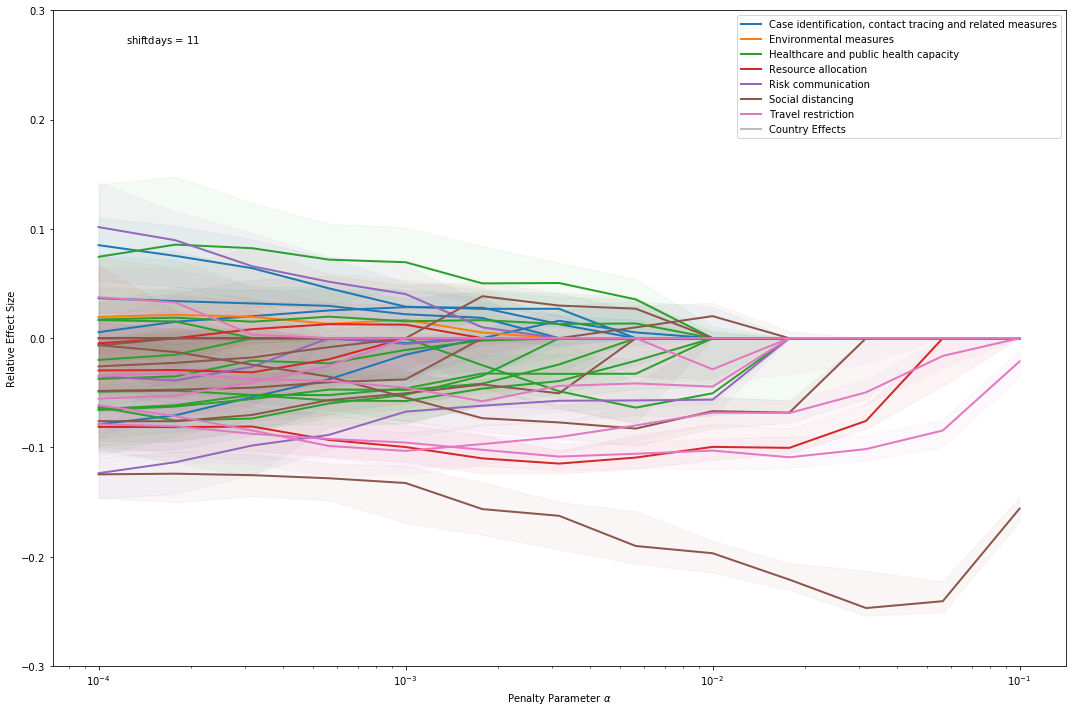

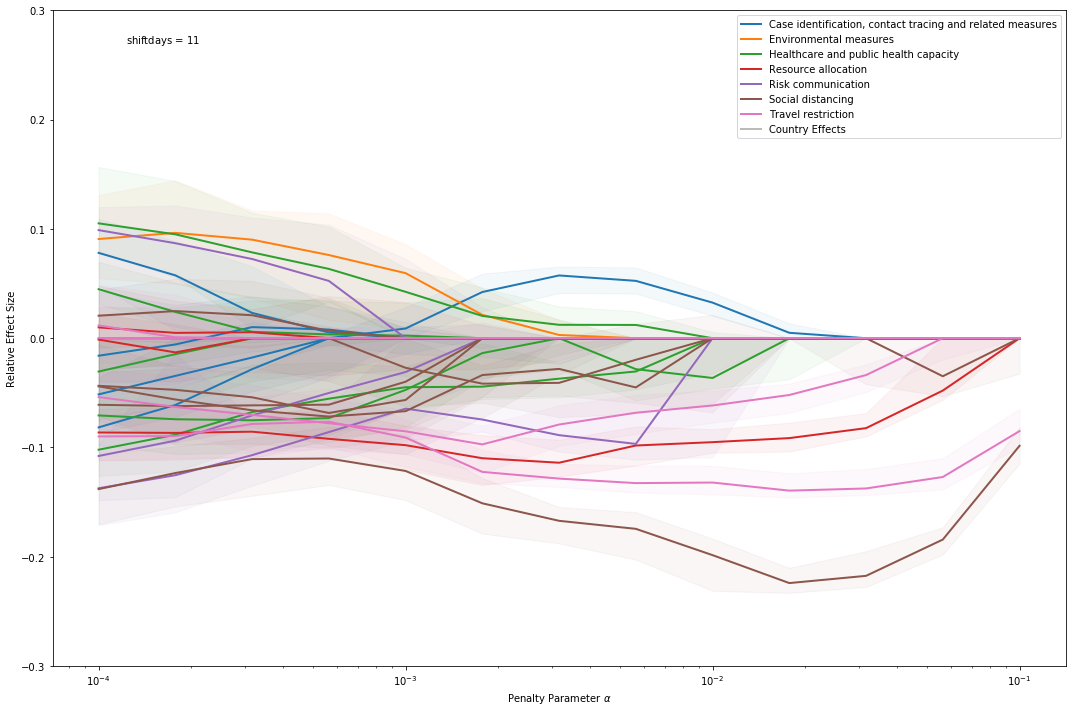

In [12]:
crossval_2020_03_19.PlotCVAlphaSweep(shiftdays=[4],ylim=(-.3,.3),filename = 'CV_Rt2_alphasweep_20200319.pdf')
crossval_2020_03_31.PlotCVAlphaSweep(shiftdays=[11],ylim=(-.3,.3),filename = 'CV_Rt2_alphasweep_20200331.pdf')
crossval_2020_04_06.PlotCVAlphaSweep(shiftdays=[11],ylim=(-.3,.3),filename = 'CV_Rt2_alphasweep_20200406.pdf')

In [15]:
crossval_2020_03_19.GetMeasureEffects(drop_zeros = True).to_csv('lasso_measureeffects_Rt2_cutoff20200319.csv')
crossval_2020_03_31.GetMeasureEffects(drop_zeros = True).to_csv('lasso_measureeffects_Rt2_cutoff20200331.csv')
crossval_2020_04_06.GetMeasureEffects(drop_zeros = True).to_csv('lasso_measureeffects_Rt2_cutoff20200406.csv')
